# UV-Guider alignement with source in autocoll
##  Field 2

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function

import sys
sys.path.insert(1, './Calibration')

import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table
import matplotlib.patches as patches

from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit

from Calibration.mapping import Mapping

In [2]:
cloudpath = '/home/dvibert/ownCloud/FIREBALL/'


## initialization from last xy calib

In [3]:
G2UV = Guider2UV(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F2_180901.pkl')
print(G2UV)

FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39837843, 36.42897653)>): (lon, lat) in deg
    [(0.18496501, -0.02412983)]>
FOV center pixel position in guider [array([1366.06657564]), array([431.55331128])]

Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=-20.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (253.0624, 34.9699)>)>
    gamma: 0.9970115643897801

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39837843, 36.42897653)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.39837843  36.4289765325  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024600287745946  0.00024580474694405  
NAXIS : 0  0

    mask_rotation:

In [4]:
target_filename = '/home/dvibert/ownCloud/FIREBALL/Target_selection/targets_F2.txt'
F2 = Table.read(target_filename, format='ascii')

## Diffuse UV image

load new mapping

In [8]:
mask_det_map_file = cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/Detector_Mask_mappings/mapping-mask-det-180612-F2.pkl'
mask_det_map = Mapping(mask_det_map_file)
G2UV.set_detector_mapping(mask_det_map, offsets = [1., 1.])


## Scan sequence

GC - 37 - 42 - 44 - 38 - 16 - 9 - 8 - 26  


In [9]:
#from guider2UV.guider2UV import Guider2UV
slits = ['37', '42', '44', '38', '16', '9', '8', '26'] 

movs, slits_coord = G2UV.compute_autocoll_moves_slits(slits, F2, hystcomp = True)

slit position in mm on mask: [ 4.02636 -5.77259]
slit position in mm on mask: [ 6.431447 -0.117245]
slit position in mm on mask: [7.267641 3.348729]
slit position in mm on mask: [4.334963 3.091563]
slit position in mm on mask: [-5.545143 -0.426152]
slit position in mm on mask: [-8.420053  0.443957]
slit position in mm on mask: [-8.63111  -3.466157]
slit position in mm on mask: [-2.111124 -5.892199]

targets local coords in siderostat local frame:
EL: 87.8 arcsec ; CE: 209.1 arcsec
EL: 327.5 arcsec ; CE: 307.7 arcsec
EL: 474.3 arcsec ; CE: 341.9 arcsec
EL: 463.0 arcsec ; CE: 220.8 arcsec
EL: 313.0 arcsec ; CE: -186.6 arcsec
EL: 349.5 arcsec ; CE: -305.6 arcsec
EL: 183.9 arcsec ; CE: -314.0 arcsec
EL: 82.0 arcsec ; CE: -44.3 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 87.8 arcsec ; CE 209.1 arcsec ; image: True
EL: 239.7 arcsec ; CE 98.6 arcsec ; image: True
EL: 146.9 arcsec ; CE 34.2 arcsec ; imag

In [68]:
movs.sum(axis=0)

array([1.42108547e-14, 0.00000000e+00])

observed slits position :

In [85]:
slits_coord_obs_det = np.array([
       [2075.0313332 ,  547.1837469 ],
       [1694.46040086,  364.12707452],
       [1459.24135094,  304.18536352],
       [1481.23050022,  524.06001572],
       [1725.16305356, 1277.10559979],
       [1666.1004412 , 1498.52502653],
       [1927.08650574, 1511.38206425],
       [2088.18460048, 1014.57232211],
       [2088.07680252, 1009.05912876],
       [1926.62694293, 1515.59833999],
       [1665.40137023, 1502.45267976],
       [1724.7718892 , 1281.98014583],
       [1480.597437  ,  530.26551288],
       [1457.9982084 ,  300.01849547],
       [1692.86385774,  359.28314686],
       [2073.83585872,  541.7236364 ]])


slits_coord_obs_det

array([[2075.0313332 ,  547.1837469 ],
       [1694.46040086,  364.12707452],
       [1459.24135094,  304.18536352],
       [1481.23050022,  524.06001572],
       [1725.16305356, 1277.10559979],
       [1666.1004412 , 1498.52502653],
       [1927.08650574, 1511.38206425],
       [2088.18460048, 1014.57232211],
       [2088.07680252, 1009.05912876],
       [1926.62694293, 1515.59833999],
       [1665.40137023, 1502.45267976],
       [1724.7718892 , 1281.98014583],
       [1480.597437  ,  530.26551288],
       [1457.9982084 ,  300.01849547],
       [1692.86385774,  359.28314686],
       [2073.83585872,  541.7236364 ]])

In [86]:
valid = np.isfinite(slits_coord_obs_det[:,0])
#valid = np.array([True]*8 + [False]*8)
obs_wave = G2UV.mask_det_map.w[0]
print("wave: ", obs_wave)

slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.20255


In [87]:
slits_coord_valid

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>): (lon, lat) in deg
     [(0.04893897, -0.11956206)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>): (lon, lat) in deg
     [(0.18261289, -0.17596011)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>): (lon, lat) in deg
     [(0.26451288, -0.19553401)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>): (lon, lat) in deg
     [(0.25821115, -0.12624249)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>): (lon, lat) in deg
     [(0.17454844, 0.1067224)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>):

Text(0,0.5,'Ce arcsec')

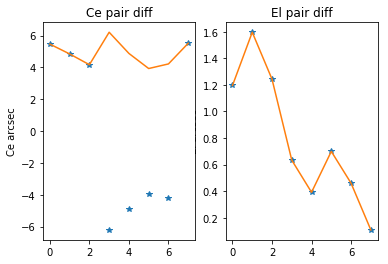

In [88]:
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
pair_diff
plt.figure()
plt.subplot('120')
plt.plot(pair_diff[:,0],'*')
plt.plot(np.abs(pair_diff[:,0]),'-')
plt.title("El pair diff")
plt.ylabel("El arcsec")
plt.subplot('121')
plt.plot(pair_diff[:,1],'*')
plt.plot(np.abs(pair_diff[:,1]),'-')
plt.title("Ce pair diff")
plt.ylabel("Ce arcsec")


In [89]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )


Fitting rotation, translation and magnification
gamma: 1.0040019827024307
theta: 3.0417111669815697 arcmin
dx: -6.036699495989599 arcsec
dy: -0.6268739196853002 arcsec
variances: [4.15678072e-04 1.42899595e+00 3.45995123e-01 3.45995123e-01]

residuals in arcsec: [[-1.24643378  4.36367746]
 [-0.91066201  0.89015133]
 [-0.17710793  2.8578891 ]
 [-0.19284725 -2.3004637 ]
 [-0.67749448 -2.90049624]
 [-0.06161603 -1.85816349]
 [ 0.74738917 -3.27839866]
 [-1.32910726  2.68807186]
 [-1.2226843  -3.41045802]
 [ 1.29468861  1.38323624]
 [ 0.79168381  2.49493922]
 [-0.18513738  2.49317325]
 [ 0.71477842  4.55138014]
 [ 1.27462443 -1.75877315]
 [ 0.98721793 -4.48835976]
 [ 0.19270804 -1.72740559]]
max residual in EL,CE 1.3, 4.6 arcsec
mean residual in EL,CE 0.9, 2.9 arcsec


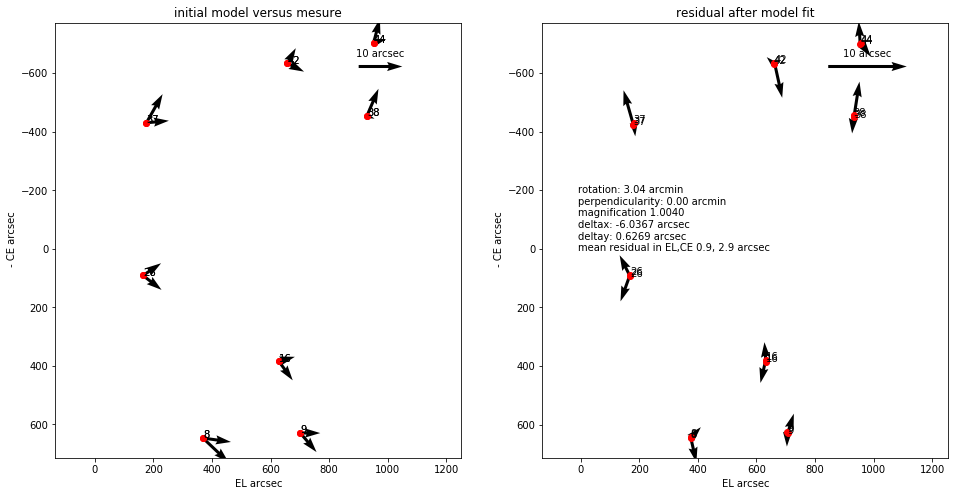

In [90]:
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)

G2UVcor = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True)

In [95]:
#G2UVcor.save(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F2_180904.pkl')

Dumping to /home/dvibert/ownCloud/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F2_180904.pkl


In [92]:
movs_new, slits_coord_new = G2UVcor.compute_autocoll_moves_slits(slits, F2, hystcomp = True)

slit position in mm on mask: [ 4.02636 -5.77259]
slit position in mm on mask: [ 6.431447 -0.117245]
slit position in mm on mask: [7.267641 3.348729]
slit position in mm on mask: [4.334963 3.091563]
slit position in mm on mask: [-5.545143 -0.426152]
slit position in mm on mask: [-8.420053  0.443957]
slit position in mm on mask: [-8.63111  -3.466157]
slit position in mm on mask: [-2.111124 -5.892199]

targets local coords in siderostat local frame:
EL: 85.3 arcsec ; CE: 210.2 arcsec
EL: 326.0 arcsec ; CE: 309.0 arcsec
EL: 473.5 arcsec ; CE: 343.2 arcsec
EL: 462.1 arcsec ; CE: 221.6 arcsec
EL: 311.1 arcsec ; CE: -187.4 arcsec
EL: 347.6 arcsec ; CE: -306.8 arcsec
EL: 181.3 arcsec ; CE: -315.1 arcsec
EL: 79.3 arcsec ; CE: -44.2 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 85.3 arcsec ; CE 210.2 arcsec ; image: True
EL: 240.8 arcsec ; CE 98.8 arcsec ; image: True
EL: 147.5 arcsec ; CE 34.2 arcsec ; imag

## Star sequence

gc - s36 - s40 - s46 - s21


In [93]:
star_target_path = cloudpath + 'Target_selection/GuidingStars/'
F2_stars = Table.read(star_target_path + "F2_guidingstars.fits", format='fits')

stars = [36, 40, 46, 21 ]

#F2_stars_coords = coordinates.SkyCoord(F2_stars['RA']*u.deg, F2_stars['DEC']*u.deg)

star_movs, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F2_stars, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(252.895501, 34.875333)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(252.83754, 34.836825)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(252.787662, 34.810634)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(252.829951, 34.945769)]>

targets local coords in siderostat local frame:
EL: 41.7 arcsec ; CE: 116.7 arcsec
EL: -62.0 arcsec ; CE: 151.7 arcsec
EL: -147.1 arcsec ; CE: 170.4 arcsec
EL: -6.0 arcsec ; CE: -31.1 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 41.7 arcsec ; CE 116.7 arcsec ; image: True
EL: -103.7 arcsec ; CE 35.0 arcsec ; image: True
EL: -85.0 arcsec ; CE 18.6 arcsec ; image: True
EL: 141.1 arcsec ; CE -201.5 arcsec ; image: True
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -141.1 arcsec ; CE 231.5 arcsec ; i

In [94]:
stars_coord

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>): (lon, lat) in deg
     [(0.02323068, -0.06674584)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>): (lon, lat) in deg
     [(-0.03460088, -0.08676068)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>): (lon, lat) in deg
     [(-0.08202328, -0.09742144)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39837843, 36.42897653)>): (lon, lat) in deg
     [(-0.00332875, 0.01778478)]>]

------------------------------------------------------